In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import time 
import scipy.stats as ss
from urllib.parse import urlencode
from scipy import stats
from scipy.stats import ttest_ind

# Задание 1

In [2]:
# загрузка наши данные 
auth_data = pd.read_csv('C:/Users/PC/final_project/problem1-auth_data.csv', delimiter=';', encoding='windows-1251')
reg_data = pd.read_csv('C:/Users/PC/final_project/problem1-reg_data.csv', delimiter=';', encoding='windows-1251')

# Проверка данных

In [3]:
auth_data.head()

,auth_ts,uid
0,911382223,1
1,932683089,2
2,932921206,2
3,933393015,2
4,933875379,2


In [4]:
# смотрим число строчек
auth_data.shape 

(9601013, 2)

In [5]:
reg_data.head()

,reg_ts,uid
0,911382223,1
1,932683089,2
2,947802447,3
3,959523541,4
4,969103313,5


In [6]:
# меньше чем auth_data
reg_data.shape 

(1000000, 2)

In [7]:
# Процент игроков, возвращающихся в игру после определенного количества месяцев с момента их регистрации.
reg_data['reg_date'] = pd.to_datetime(reg_data['reg_ts'], unit='s')
auth_data['auth_date'] = pd.to_datetime(auth_data['auth_ts'], unit='s')

In [8]:
# проверка после переведение на datetime время
reg_data.head() 

,reg_ts,uid,reg_date
0,911382223,1,1998-11-18 09:43:43
1,932683089,2,1999-07-22 22:38:09
2,947802447,3,2000-01-13 22:27:27
3,959523541,4,2000-05-28 14:19:01
4,969103313,5,2000-09-16 11:21:53


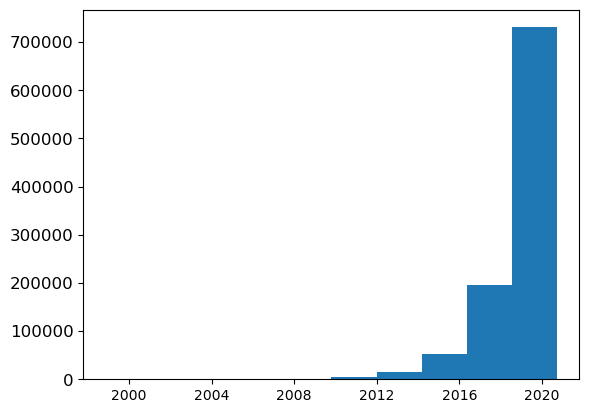

In [9]:
#  Show the plot
ax = reg_data['reg_date'].hist(grid=False, 
                        xlabelsize=10, 
                        ylabelsize=12, 
                       )
plt.show()

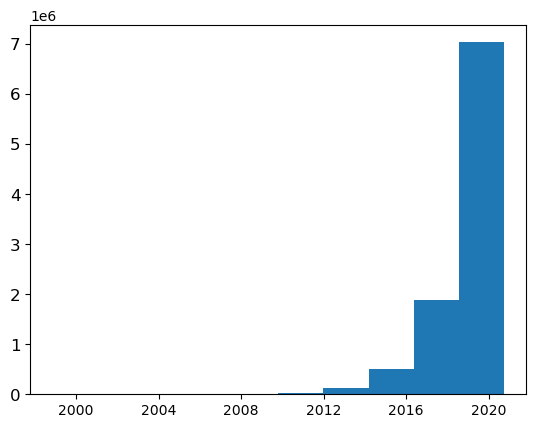

In [10]:
ax = auth_data['auth_date'].hist(grid=False,
                        xlabelsize=10, 
                        ylabelsize=12,
                       )
plt.show()

In [11]:
auth_data.head()

,auth_ts,uid,auth_date
0,911382223,1,1998-11-18 09:43:43
1,932683089,2,1999-07-22 22:38:09
2,932921206,2,1999-07-25 16:46:46
3,933393015,2,1999-07-31 03:50:15
4,933875379,2,1999-08-05 17:49:39


In [12]:
# тип данных
reg_data.dtypes 

reg_ts               int64
uid                  int64
reg_date    datetime64[ns]
dtype: object

In [13]:
auth_data.dtypes

auth_ts               int64
uid                   int64
auth_date    datetime64[ns]
dtype: object

In [14]:
# Объединение данных по uid
merged_data = pd.merge(reg_data, auth_data, on='uid')
merged_data

,reg_ts,uid,reg_date,auth_ts,auth_date
0,911382223,1,1998-11-18 09:43:43,911382223,1998-11-18 09:43:43
1,932683089,2,1999-07-22 22:38:09,932683089,1999-07-22 22:38:09
2,932683089,2,1999-07-22 22:38:09,932921206,1999-07-25 16:46:46
3,932683089,2,1999-07-22 22:38:09,933393015,1999-07-31 03:50:15
4,932683089,2,1999-07-22 22:38:09,933875379,1999-08-05 17:49:39
...,...,...,...,...,...
9601008,1600874034,1110618,2020-09-23 15:13:54,1600874034,2020-09-23 15:13:54
9601009,1600874086,1110619,2020-09-23 15:14:46,1600874086,2020-09-23 15:14:46
9601010,1600874139,1110620,2020-09-23 15:15:39,1600874139,2020-09-23 15:15:39
9601011,1600874191,1110621,2020-09-23 15:16:31,1600874191,2020-09-23 15:16:31


In [15]:
# Расчет retention
def calculate_retention(data, day):
    total_users = data['uid'].nunique()
    retained_users = data[data['auth_date'] - data['reg_date'] >= pd.Timedelta(days=day)]['uid'].nunique()
    retention_rate = retained_users / total_users
    return retention_rate

In [16]:
reg_data.head()

,reg_ts,uid,reg_date
0,911382223,1,1998-11-18 09:43:43
1,932683089,2,1999-07-22 22:38:09
2,947802447,3,2000-01-13 22:27:27
3,959523541,4,2000-05-28 14:19:01
4,969103313,5,2000-09-16 11:21:53


In [17]:
auth_data.head()

,auth_ts,uid,auth_date
0,911382223,1,1998-11-18 09:43:43
1,932683089,2,1999-07-22 22:38:09
2,932921206,2,1999-07-25 16:46:46
3,933393015,2,1999-07-31 03:50:15
4,933875379,2,1999-08-05 17:49:39


In [18]:
# Пример использования функции для расчета retention на 1-й и 7-й день
retention_day1 = calculate_retention(merged_data, 1)
retention_day7 = calculate_retention(merged_data, 7)

In [19]:
print(f'Retention на 1-й день: {retention_day1}')
print(f'Retention на 7-й день: {retention_day7}')

Retention на 1-й день: 0.238378
Retention на 7-й день: 0.209939


In [20]:
df_all = pd.merge(auth_data, reg_data, how='left', on='uid')
df_all

,auth_ts,uid,auth_date,reg_ts,reg_date
0,911382223,1,1998-11-18 09:43:43,911382223,1998-11-18 09:43:43
1,932683089,2,1999-07-22 22:38:09,932683089,1999-07-22 22:38:09
2,932921206,2,1999-07-25 16:46:46,932683089,1999-07-22 22:38:09
3,933393015,2,1999-07-31 03:50:15,932683089,1999-07-22 22:38:09
4,933875379,2,1999-08-05 17:49:39,932683089,1999-07-22 22:38:09
...,...,...,...,...,...
9601008,1600874034,1110618,2020-09-23 15:13:54,1600874034,2020-09-23 15:13:54
9601009,1600874086,1110619,2020-09-23 15:14:46,1600874086,2020-09-23 15:14:46
9601010,1600874139,1110620,2020-09-23 15:15:39,1600874139,2020-09-23 15:15:39
9601011,1600874191,1110621,2020-09-23 15:16:31,1600874191,2020-09-23 15:16:31


In [21]:
print('Последняя авторизация: ', df_all['auth_date'].min())
print('Последняя авторизация: ', df_all['auth_date'].max())

Последняя авторизация:  1998-11-18 09:43:43
Последняя авторизация:  2020-09-23 15:17:24


In [22]:
#  берём промежуток для анализа 
#  из промежутка берём месяцев
begin_data = datetime.date(2018, 1, 1) 
end_data = datetime.date(2020, 9, 24)
df_all['reg_month'] = pd.to_datetime(df_all['reg_ts'], unit='s').dt.to_period('M') 

In [23]:
# Добавим столбец, отражающий количество месяцев с момента регистрации игроков.
df_all['months_starting_reg'] = ((df_all.auth_date - df_all.reg_date) / np.timedelta64(1, 'M')).astype(int)

In [24]:
# Отфильтруем данные, чтобы оставить только информацию за нужный период после регистрации игроков.
df_filtr_to_data = df_all.query('reg_date >= @begin_data and auth_date <= @end_data')
df_filtr_to_data.size

37292234

In [25]:
# Когорт анализ
kohorts_months = df_filtr_to_data.groupby(['reg_month', 'months_starting_reg'], as_index=False)\
                .agg({'uid': 'nunique'}).pivot(index='reg_month', columns='months_starting_reg', values='uid')
kohorts_months

months_starting_reg,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
reg_month,,,,,,,,,,,,,,,,,,,,,
2018-01,10156.0,997.0,488.0,488.0,488.0,488.0,488.0,488.0,488.0,488.0,...,488.0,488.0,488.0,488.0,488.0,488.0,488.0,488.0,486.0,29.0
2018-02,9630.0,964.0,491.0,491.0,491.0,491.0,491.0,491.0,491.0,491.0,...,491.0,491.0,491.0,491.0,491.0,491.0,491.0,491.0,37.0,NaN
2018-03,11191.0,1130.0,571.0,571.0,571.0,571.0,571.0,571.0,571.0,571.0,...,571.0,571.0,571.0,571.0,571.0,571.0,571.0,85.0,NaN,NaN
2018-04,11387.0,1146.0,602.0,602.0,602.0,602.0,602.0,602.0,602.0,602.0,...,602.0,602.0,602.0,602.0,602.0,602.0,95.0,NaN,NaN,NaN
2018-05,12372.0,1292.0,632.0,632.0,632.0,632.0,632.0,632.0,632.0,632.0,...,632.0,632.0,632.0,632.0,632.0,138.0,NaN,NaN,NaN,NaN
2018-06,12588.0,1292.0,660.0,660.0,660.0,660.0,660.0,660.0,660.0,660.0,...,660.0,660.0,660.0,660.0,135.0,NaN,NaN,NaN,NaN,NaN
2018-07,13678.0,1354.0,655.0,655.0,655.0,655.0,655.0,655.0,655.0,655.0,...,655.0,655.0,655.0,140.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-08,14392.0,1411.0,701.0,701.0,701.0,701.0,701.0,701.0,701.0,701.0,...,701.0,701.0,168.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09,14645.0,1412.0,732.0,732.0,732.0,732.0,732.0,732.0,732.0,732.0,...,732.0,185.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 300.7222222222222, 'Определение количества месяцев, прошедших с момента регистрации игроков')

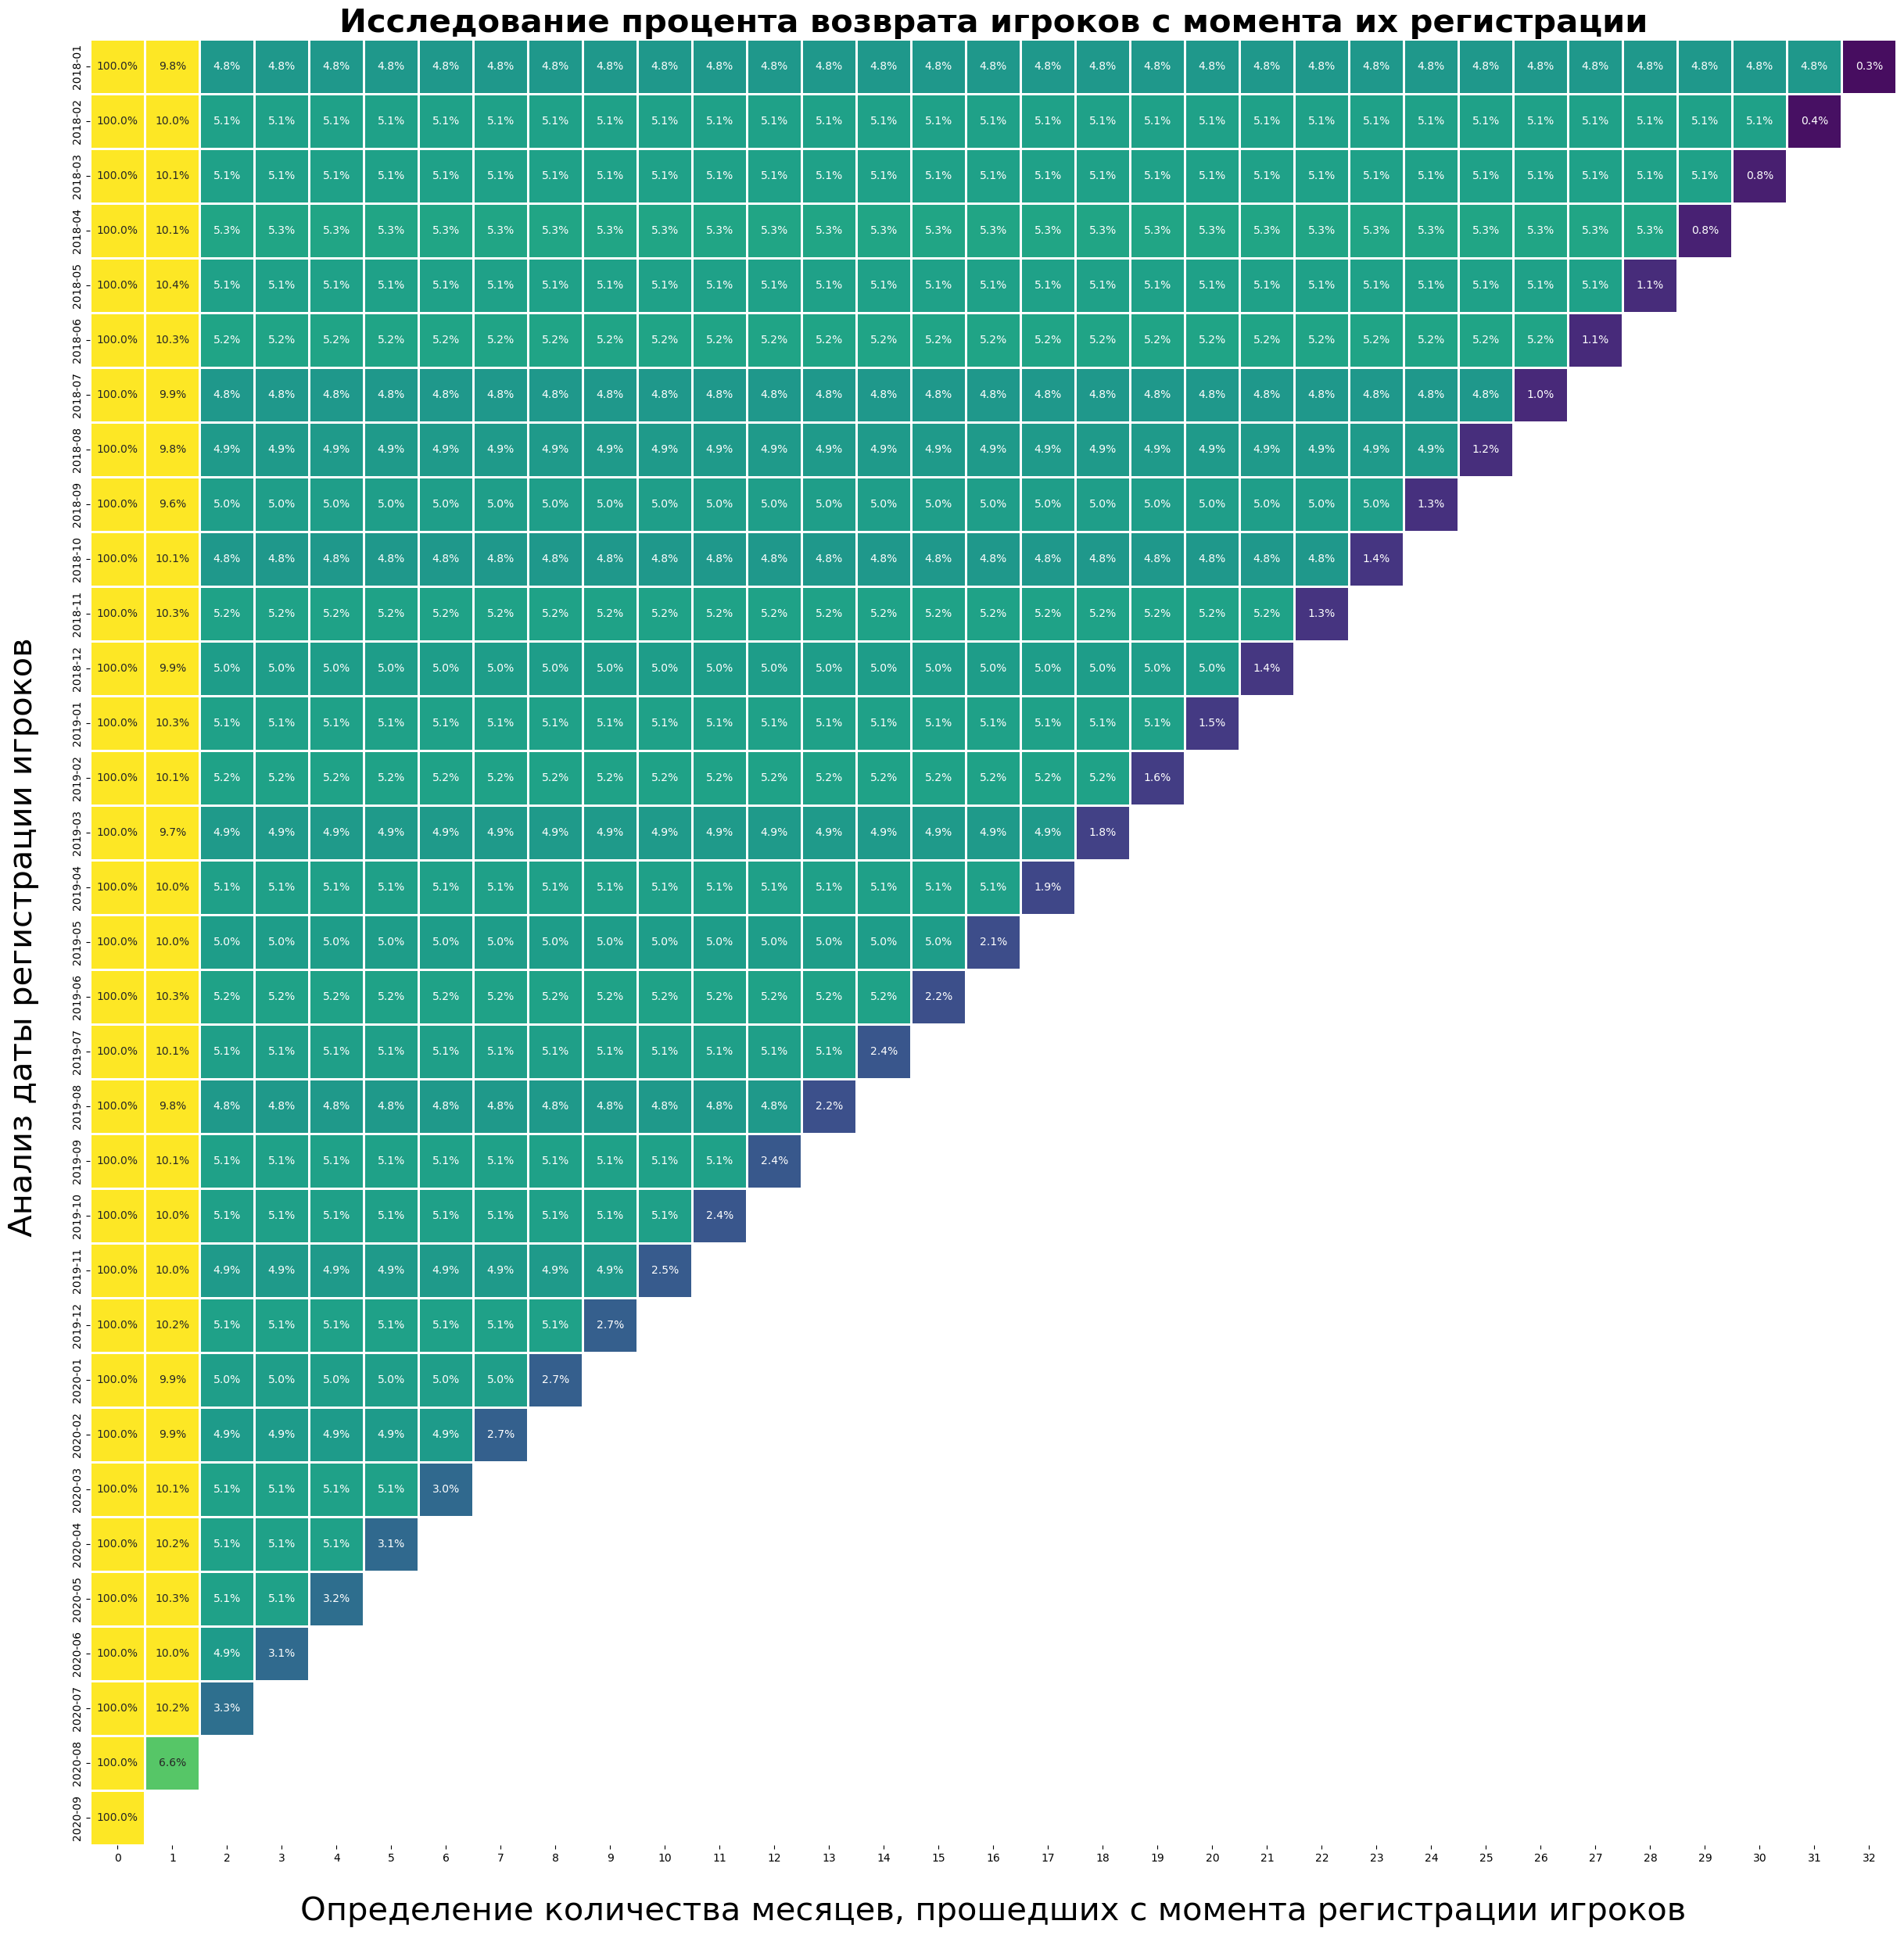

In [26]:
# Процент возврата игроков с момента их регистрации до определенной даты (в месяцах).
plt.figure(figsize=(30,30))
plt.title('Исследование процента возврата игроков с момента их регистрации', fontweight='black', size=30)
sns.heatmap(kohorts_months.div(kohorts_months[0], axis=0), vmin=0.0, vmax=0.09, cmap='viridis', 
            fmt='.1%', annot=True, linewidths=1, linecolor='white', square=True, cbar=False)
plt.ylabel(' Анализ даты регистрации игроков', labelpad=30, size=30)
plt.xlabel('Определение количества месяцев, прошедших с момента регистрации игроков', labelpad=30, size=30)

# Retention на годах

In [27]:
#  промежуток в годах
begin_data = datetime.date(1998, 11, 19)
end_data = datetime.date(2020, 9, 24)
df_all['reg_year'] = pd.to_datetime(df_all['reg_ts'], unit='s').dt.to_period('Y') 

In [28]:
# Добавим столбец, отражающий количество годах с момента регистрации игроков.
df_all['years_starting_reg'] = ((df_all.auth_date - df_all.reg_date) / np.timedelta64(1, 'Y')).astype(int)

In [29]:
# Отфильтруем данные, чтобы оставить только информацию за нужный период после регистрации игроков.
df_filtr_to_data = df_all.query('reg_date >= @begin_data and auth_date <= @end_data')
df_filtr_to_data.size

86409108

In [30]:
df_filtr_to_data

,auth_ts,uid,auth_date,reg_ts,reg_date,reg_month,months_starting_reg,reg_year,years_starting_reg
1,932683089,2,1999-07-22 22:38:09,932683089,1999-07-22 22:38:09,1999-07,0,1999,0
2,932921206,2,1999-07-25 16:46:46,932683089,1999-07-22 22:38:09,1999-07,0,1999,0
3,933393015,2,1999-07-31 03:50:15,932683089,1999-07-22 22:38:09,1999-07,0,1999,0
4,933875379,2,1999-08-05 17:49:39,932683089,1999-07-22 22:38:09,1999-07,0,1999,0
5,934372615,2,1999-08-11 11:56:55,932683089,1999-07-22 22:38:09,1999-07,0,1999,0
...,...,...,...,...,...,...,...,...,...
9601008,1600874034,1110618,2020-09-23 15:13:54,1600874034,2020-09-23 15:13:54,2020-09,0,2020,0
9601009,1600874086,1110619,2020-09-23 15:14:46,1600874086,2020-09-23 15:14:46,2020-09,0,2020,0
9601010,1600874139,1110620,2020-09-23 15:15:39,1600874139,2020-09-23 15:15:39,2020-09,0,2020,0
9601011,1600874191,1110621,2020-09-23 15:16:31,1600874191,2020-09-23 15:16:31,2020-09,0,2020,0


In [31]:
kohorts_years = df_filtr_to_data.groupby(['reg_year', 'years_starting_reg'], as_index=False)\
                .agg({'uid': 'nunique'}).pivot(index='reg_year', columns='years_starting_reg', values='uid')
kohorts_years

years_starting_reg,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
reg_year,,,,,,,,,,,,,,,,,,,,,
1999,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2000,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005,65.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2006,119.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,7.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,216.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


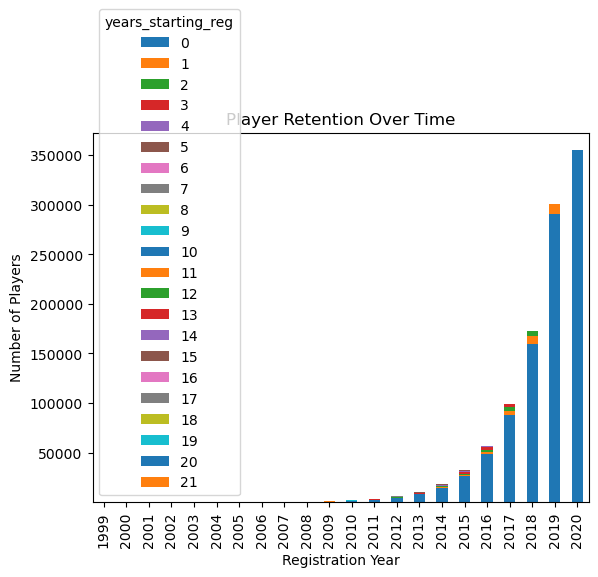

In [32]:
# Визуализация по графику (годам)
kohorts_years.plot(kind='bar', stacked=True)
plt.title('Player Retention Over Time')
plt.xlabel('Registration Year')
plt.ylabel('Number of Players')
plt.show()

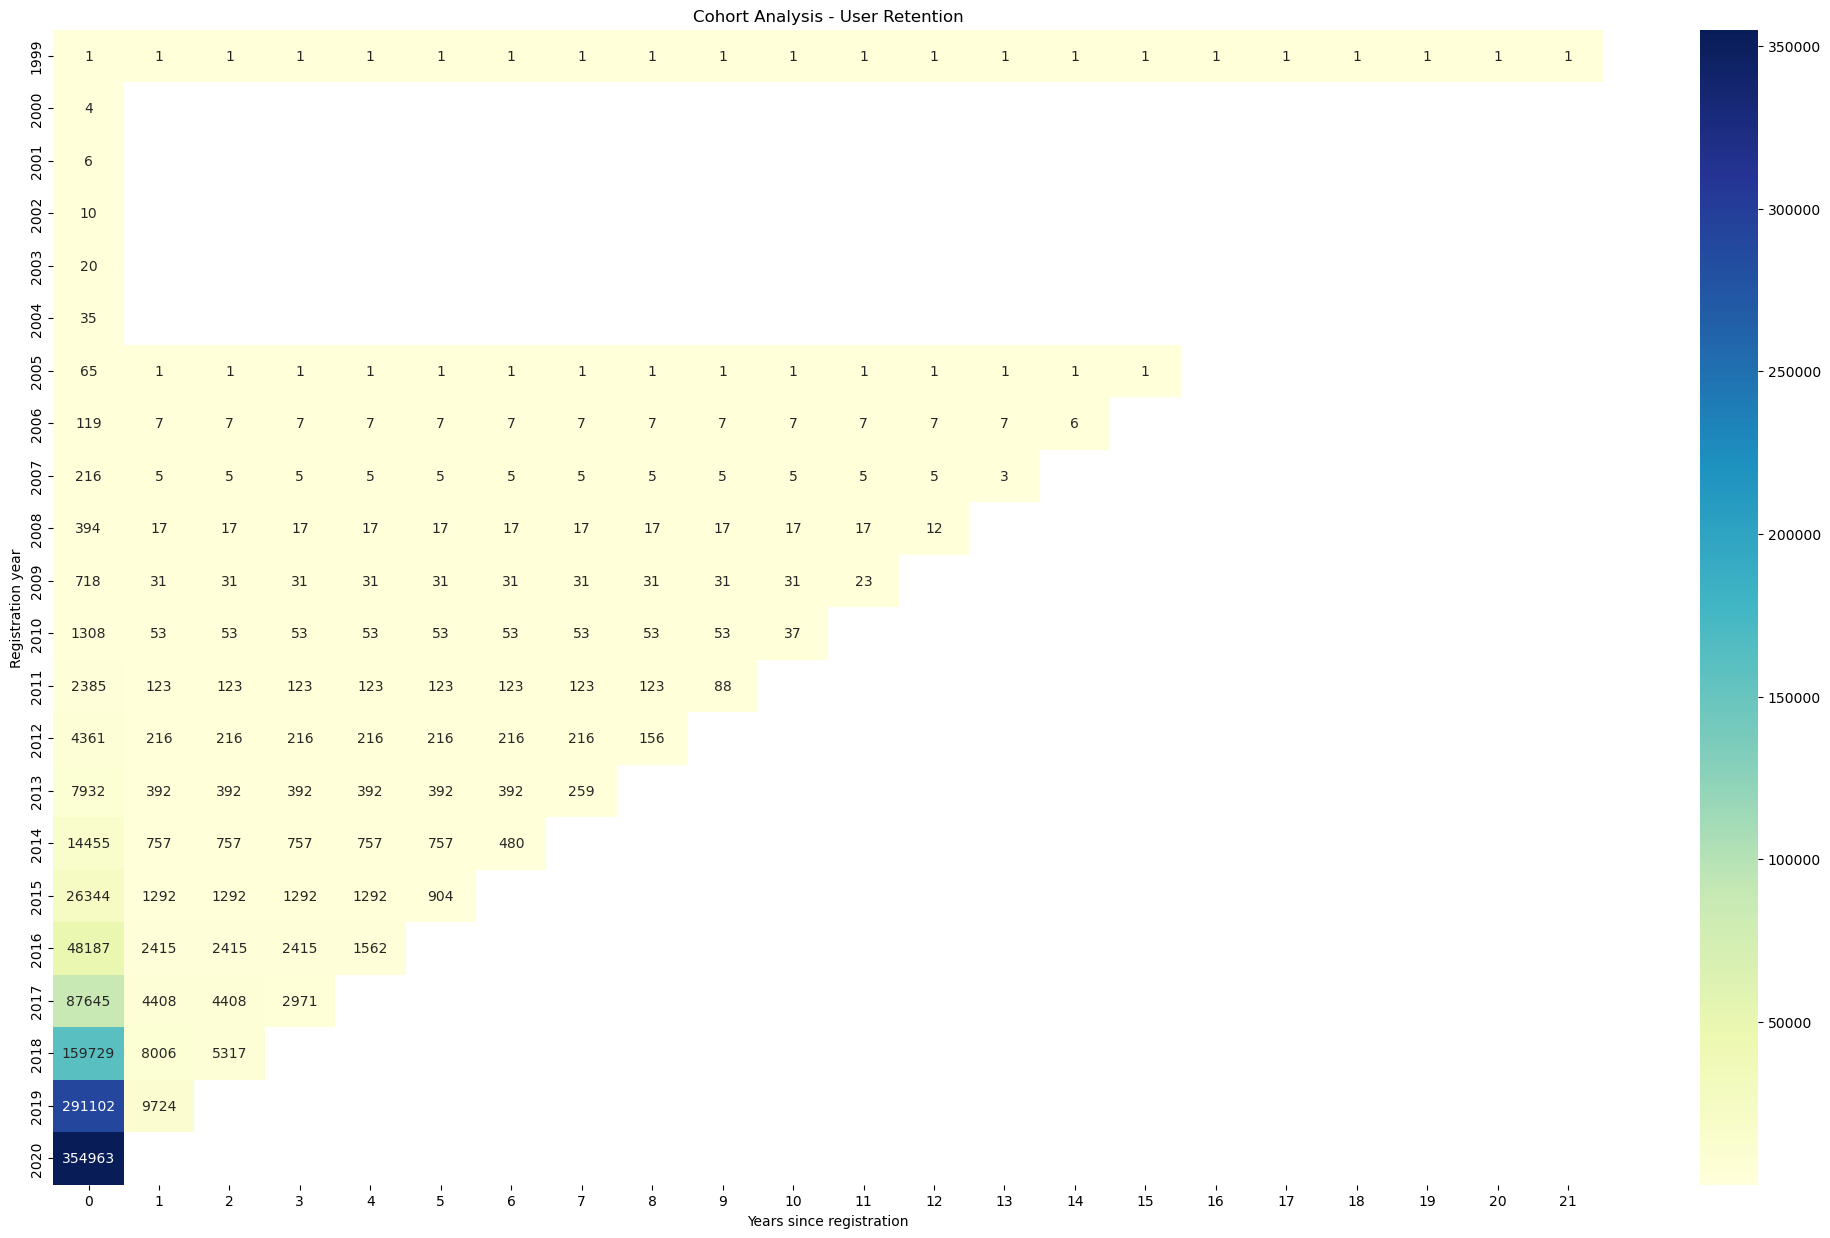

In [33]:
plt.figure(figsize=(25, 15))
plt.title('Cohort Analysis - User Retention')
sns.heatmap(kohorts_years, annot=True, fmt='.0f', cmap='YlGnBu')
plt.xlabel('Years since registration')
plt.ylabel('Registration year')
plt.show()

Функция Retention:
    1)reg_data - данные о регистрации пользователей
    2)auth_data - данные о авторизации пользователей в игре
    3)time_period - пределяет масштаб графиков и таблиц и может принимать значения:
        'D' для дневного, 
        'M' для месячного,
        'Y' для годового периода
    4)begin_data - дата начала отчетного периода
    5)end_data - дата окончания отчетного периода
    6)visualization - можно выбрать в визуализации отображения данных, 
    используя значения 'heatmap' для тепловой карты и 'table' для таблицы.

In [34]:
def retention(reg_data, auth_data, time_period, begin_data, end_data, visualization):
    # Здесь можно увидеть преобразование строки с датой в объект datetime, а затем в кортеж, содержащий значения даты и времени
    start_date = time.mktime(datetime.datetime.strptime(begin_data, "%Y-%m-%d").timetuple())
    end_date = time.mktime(datetime.datetime.strptime(end_data, "%Y-%m-%d").timetuple())
    # Отфильтруем данные, чтобы оставить только информацию за нужный период после регистрации игроков.
    filtered_data = auth_data.merge(reg_data, how='left', on='uid')\
        .query('reg_ts >= @start_date and auth_ts <= @end_date')
    # Перевод в нужной тип и фильтрации данных
    filtered_data['auth_data'] = pd.to_datetime(filtered_data['auth_ts'], unit='s').dt.date
    filtered_data['reg_data'] = pd.to_datetime(filtered_data['reg_ts'], unit='s').dt.date
    filtred_date = filtered_data.auth_date - filtered_data.reg_date
    filtered_data['time_period'] = (filtred_date / np.timedelta64(1, time_period)).astype(int)
    filtered_data['begin'] = pd.to_datetime(filtered_data['reg_ts'], unit='s').dt.to_period(time_period)
    # Когортовый анализ
    kohorts = filtered_data.groupby(['begin', 'time_period'], as_index=False)\
        .agg({'uid': 'nunique'})\
        .pivot(index='begin', columns='time_period', values='uid')

    if visualization == 'table':
        return kohorts   

    elif visualization == 'heatmap':
        plt.figure(figsize=(25, 15))
        plt.title('Kohort Analysis')
        sns.heatmap(kohorts, annot=True, fmt='.0f', cmap='YlGnBu')
        plt.xlabel('Years since registration')
        plt.ylabel('Registration year')
        return 'Heatmap'
    
    else:
        return "Incorrect check code"

In [35]:
# Retention по дням
retention(reg_data, auth_data, 'D', '2018-01-01', '2018-01-31', 'table')

time_period,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
begin,,,,,,,,,,,,,,,,,,,,,
2017-12-31,40.0,NaN,2.0,2.0,3.0,3.0,NaN,3.0,NaN,2.0,...,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2018-01-01,320.0,10.0,10.0,16.0,22.0,23.0,19.0,8.0,16.0,18.0,...,10.0,16.0,10.0,7.0,5.0,12.0,11.0,11.0,9.0,5.0
2018-01-02,320.0,12.0,16.0,18.0,17.0,22.0,17.0,9.0,20.0,13.0,...,11.0,10.0,8.0,10.0,13.0,5.0,5.0,10.0,2.0,NaN
2018-01-03,320.0,10.0,17.0,29.0,22.0,15.0,24.0,8.0,20.0,17.0,...,13.0,18.0,7.0,10.0,16.0,2.0,11.0,8.0,NaN,NaN
2018-01-04,322.0,15.0,16.0,20.0,14.0,26.0,27.0,14.0,19.0,20.0,...,14.0,14.0,22.0,8.0,13.0,16.0,2.0,NaN,NaN,NaN
2018-01-05,321.0,17.0,15.0,14.0,17.0,24.0,30.0,12.0,19.0,19.0,...,13.0,12.0,11.0,18.0,12.0,7.0,NaN,NaN,NaN,NaN
2018-01-06,323.0,10.0,14.0,10.0,17.0,23.0,25.0,10.0,13.0,19.0,...,6.0,11.0,9.0,11.0,2.0,NaN,NaN,NaN,NaN,NaN
2018-01-07,322.0,19.0,16.0,18.0,18.0,16.0,26.0,17.0,19.0,22.0,...,21.0,17.0,9.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-08,324.0,18.0,18.0,21.0,20.0,24.0,29.0,18.0,16.0,21.0,...,18.0,18.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'Heatmap'

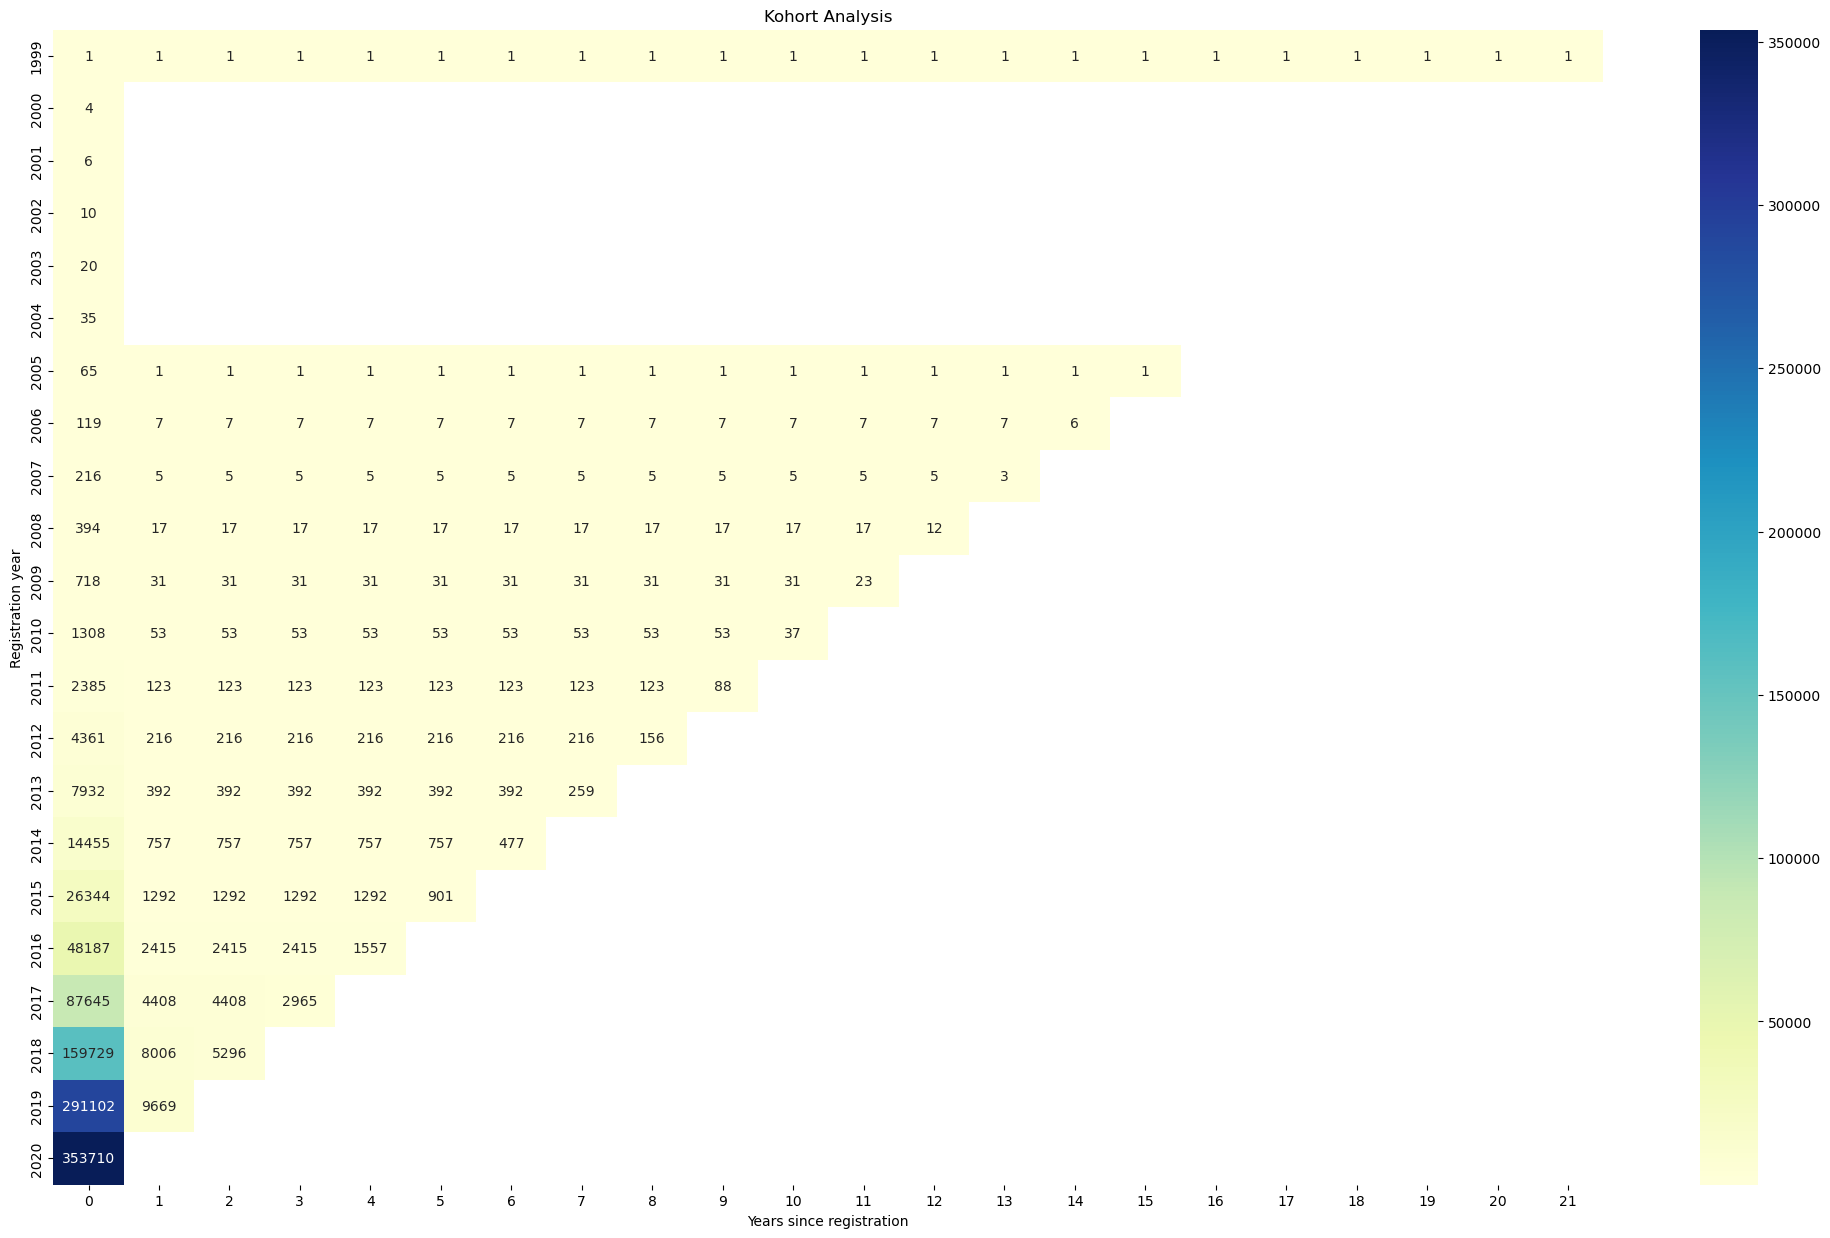

In [36]:
# Retention по годам
retention(reg_data, auth_data, 'Y', '1999-01-01', '2020-09-23', 'heatmap')

Для проведения A/B тестирования наборов акционных предложений, можно использовать следующие метрики для оценки результатов:

1. Conversion Rate (CR): Доля пользователей, совершивших целевое действие (например, покупку) от общего числа пользователей. 
    Это позволит оценить эффективность акционных предложений в привлечении пользователей к совершению целевого действия.

2. Average Revenue Per User (ARPU): Средний доход с каждого пользователя. 
    Эта метрика поможет оценить эффективность акционных предложений в увеличении выручки от пользователей.

3. Retention Rate: Уже рассчитанная метрика, которая показывает долю пользователей, 
    продолжающих использовать приложение через определенный период времени. 
    Это позволит оценить, какие акционные предложения способствуют удержанию пользователей в долгосрочной перспективе.

Для оценки результатов последнего прошедшего тематического события в игре, можно использовать следующие метрики:

1. Увеличение среднего времени проведенного в игре на пользователя: 
    Это позволит оценить, насколько событие заинтересовало пользователей и удержало их в игре.

2. Увеличение количества совершенных действий в игре: Показатель активности пользователей в игре после проведения события.

3. Увеличение конверсии в оплату: Если событие направлено на увеличение дохода от пользователей, 
    то этот показатель будет важным для оценки результатов.

4. Увеличение количества новых пользователей или повторных установок приложения: 
    Если цель события - привлечение новых пользователей или возвращение старых, 
    то этот показатель будет ключевым для оценки эффективности события.

Используя эти метрики, можно провести анализ и принять правильное решение относительно лучшего набора акционных предложений и результатов тематического события.

# ЗАДАНИЕ 2

In [3]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 
public_key = 'https://disk.yandex.ru/d/SOkIsD5A8xlI7Q' 
 
# получаем url 
final_url = base_url + urlencode(dict(public_key=public_key)) 
response = requests.get(final_url) 
download_url = response.json()['href'] 
 
# загружаем файл в df 
download_response = requests.get(download_url) 
df = pd.read_csv(download_url, sep=';')
df.head()

,user_id,revenue,testgroup
0,1,0,b
1,2,0,a
2,3,0,a
3,4,0,b
4,5,0,b


In [4]:
# Проверка на пропусков
df.isna().sum()

user_id      0
revenue      0
testgroup    0
dtype: int64

In [5]:
# Тип данных
df.dtypes

user_id       int64
revenue       int64
testgroup    object
dtype: object

In [6]:
# Данные о колонках
df.shape

(404770, 3)

In [7]:
# Начальный анализ, проверка данных
df.describe()

,user_id,revenue
count,404770.000000,404770.000000
mean,202385.500000,26.083435
std,116847.178567,681.652928
min,1.000000,0.000000
25%,101193.250000,0.000000
50%,202385.500000,0.000000
75%,303577.750000,0.000000
max,404770.000000,37433.000000


In [8]:
# Информация о данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404770 entries, 0 to 404769
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    404770 non-null  int64 
 1   revenue    404770 non-null  int64 
 2   testgroup  404770 non-null  object
dtypes: int64(2), object(1)
memory usage: 9.3+ MB


In [9]:
# Количества значение в двух группах
df_test_counts = df.groupby('testgroup', as_index=False).agg({'revenue': 'count'})
print(df_test_counts)

  testgroup  revenue
0         a   202103
1         b   202667


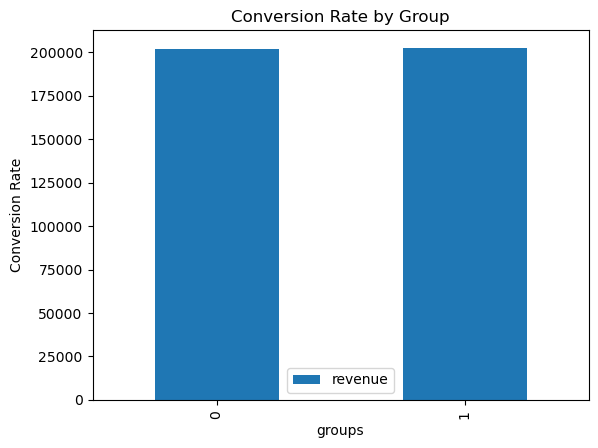

In [10]:
# barplot показывает конверсию в группах
df_test_counts.plot(kind='bar', title='Conversion Rate by Group')
plt.ylabel('Conversion Rate')
plt.xlabel('groups')
plt.show()

In [11]:
# Стандартное отклонение
df.groupby("testgroup").revenue.std()

testgroup
a    920.768137
b    287.324162
Name: revenue, dtype: float64

<AxesSubplot:xlabel='revenue', ylabel='testgroup'>

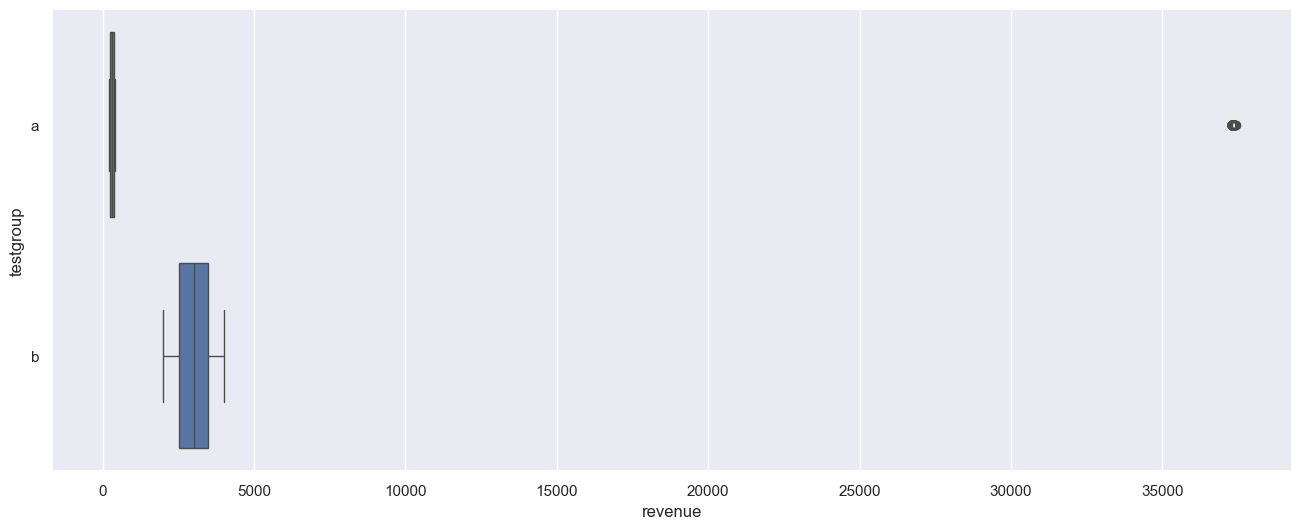

In [12]:
# Оценим визуально разброс ненулевой выручки:
sns.set(rc={'figure.figsize': (16, 6)})
sns.boxplot(data=df.query('revenue > 0'), y='testgroup', x='revenue')
#можно увидит что у нас есть выбросы в группе a

In [13]:
# Разделение данных на контрольную и тестовую группы
control_group = df[df['testgroup'] == 'a']
test_group = df[df['testgroup'] == 'b']
control_revenue = control_group.query('revenue > 0')['revenue']
test_revenue = test_group.query('revenue > 0')['revenue']

In [14]:
# В таблице показано значение которые в столбце 'revenue' больше 0 и все остальные столбцы вмести с ним
df_1 = df.query('revenue > 0')
df_1

,user_id,revenue,testgroup
72,73,351,a
160,161,3797,b
341,342,290,a
377,378,3768,b
385,386,250,a
...,...,...,...
404315,404316,262,a
404525,404526,3120,b
404543,404544,369,a
404602,404603,251,a


In [15]:
# Находим медиану для контрольных данных которые "revenue" больше 0
control_group.query('revenue > 0')['revenue'].median()

311.0

In [16]:
# Находим медиану для тестовых данных которые "revenue" больше 0
test_group.query('revenue > 0')['revenue'].median()

3022.0

In [17]:
# Максимальная значение для контрольных данных которые "revenue" больше 0
control_group.query('revenue > 0')['revenue'].max()

37433

In [18]:
# Максимальная значение для тестовых данных которые "revenue" больше 0
test_group.query('revenue > 0')['revenue'].max()

4000

In [19]:
# Минимальная значение для контрольных данных которые "revenue" больше 0
control_group.query('revenue > 0')['revenue'].min()

200

In [20]:
# Минимальная значение для тестовых данных которые "revenue" больше 0
test_group.query('revenue > 0')['revenue'].min()

2000

Вывод из перечисленных данных: что у нас медиана выручка группы b примерно в 10 раз больше медианной выручки группы а, 
    в группе а размах выручки в разы больше, чем размах в группе b,
    распределение группа b более равномерно, 
    в группе а пользователи совершают либо недорогие покупки, либо небольшая часть очень дорогие покупки.

# Проверка на нормальность распределение

<AxesSubplot:>

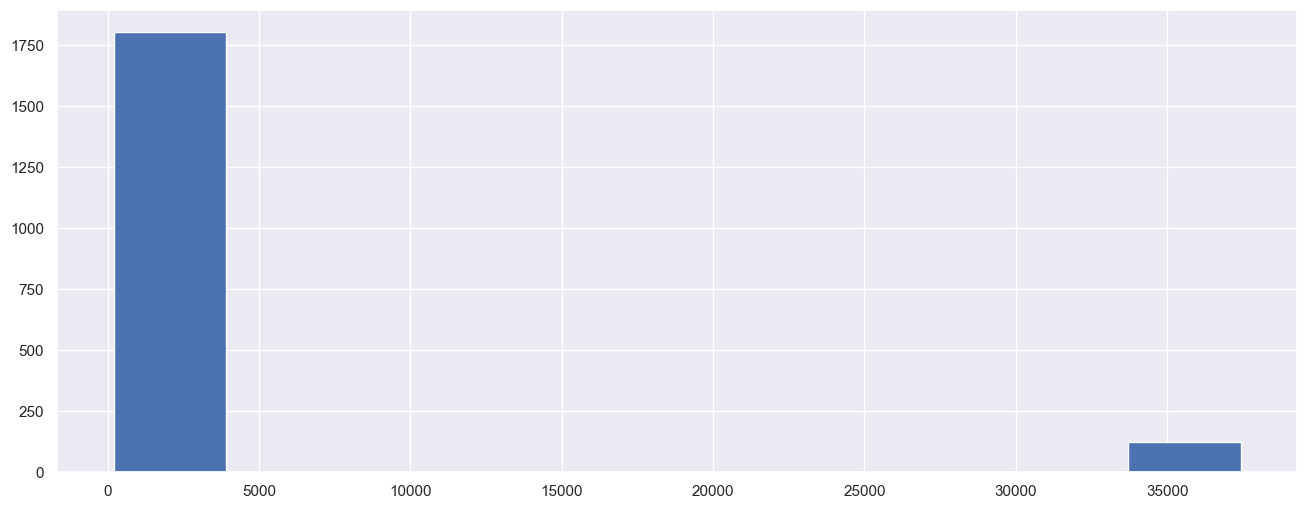

In [21]:
# Гистограмма по котрольному "revenue" значения
control_revenue.hist()
#здесь можно увидеть выброс в графике что малая часть данных находиться больше 30000 

<AxesSubplot:>

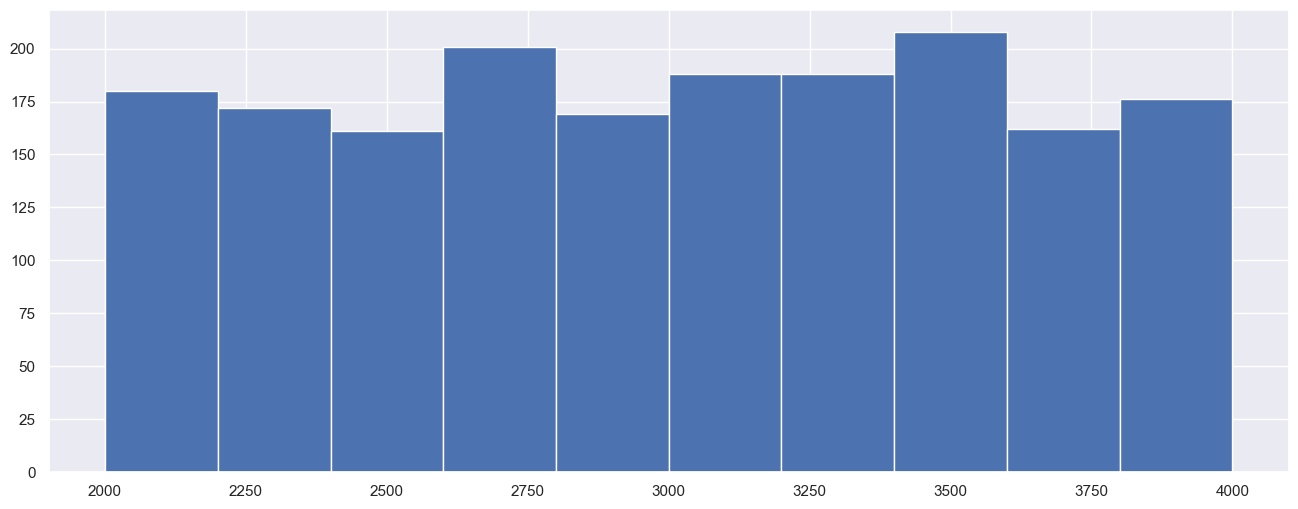

In [22]:
# Гистограмма по тестовой "revenue" значения
test_revenue.hist()

In [23]:
# Проверяем распределение на нормальность группа a
ss.normaltest(control_revenue)

NormaltestResult(statistic=1394.9457843086925, pvalue=1.2341605505935488e-303)

In [24]:
# Проверяем распределение на нормальность группа b
ss.normaltest(test_revenue)

NormaltestResult(statistic=1068.8600084412267, pvalue=7.943249488371762e-233)

Вывод: посколько у нас в обоих случаях pvalue > 0.05 то можем сказать что в обеих группах распределение отличается от нормального.

In [25]:
control_revenue.head(5)

72       351
341      290
385      250
416    37324
712      255
Name: revenue, dtype: int64

# Конверсия

Мы создаем новый список "buy". 
Затем, проходя по каждому значению в столбце "revenue" в DataFrame "df", мы добавляем в список "yes", 
если значение не равно нулю, иначе добавляем "no". 
Наконец, мы создаем новый столбец "buy" в DataFrame "df" и заполняем его значениями из списка "buy". 
Таким образом, в этой колонке будет отражено, совершал ли пользователь покупку во время проведения эксперимента или нет.

In [27]:
buy = ['yes' if i != 0 else 'no' for i in df['revenue']]
df['buy'] = buy
df.sample(5)

,user_id,revenue,testgroup,buy
61515,61516,0,b,no
249729,249730,0,b,no
159984,159985,0,a,no
210634,210635,0,b,no
281549,281550,0,a,no


In [28]:
#рассчитываем соотношение в которых пользователи не сделали покупок
count_no = df[df['buy'] == 'no'].groupby(['testgroup'], as_index=False).agg({'buy': 'count'})
count_no

,testgroup,buy
0,a,200175
1,b,200862


In [29]:
#рассчитываем соотношение в которых пользователи сделали покупок
count_yes = df[df['buy'] == 'yes'].groupby(['testgroup'], as_index=False).agg({'buy': 'count'})
count_yes

,testgroup,buy
0,a,1928
1,b,1805


In [30]:
#конверсия по группам
count_yes['conversion'] =(count_yes['buy'] / count_no['buy']) * 100
count_yes

,testgroup,buy,conversion
0,a,1928,0.963157
1,b,1805,0.898627


Для проверки статистической значимости различий в конверсии между группами А и В используем хи-квадрат тест. 
Из таблицы можно заметить, что конверсия в группе А выше примерно на 0.06% по сравнению с группой В.

In [31]:
# Проверим конверсию на статистическую значимость
crosstab = pd.crosstab(df['testgroup'], df['revenue'] > 0)
crosstab

revenue,False,True
testgroup,,
a,200175,1928
b,200862,1805


In [32]:
 # проверка на критерий Хи-квадрат
from scipy.stats import chi2_contingency
result = chi2_contingency(crosstab)
print(result)

(4.374729521260405, 0.03647561892312613, 1, array([[200239.10075104,   1863.89924896],
       [200797.89924896,   1869.10075104]]))


У нас p-value = 0.03647 из этого можно сказать что есть статистический значимость, посколько у нас меньше p-value 0.05,
что набор акционных предложений существенно повлиял на желание пользователей группы А совершать покупки.

In [33]:
# Расчет ARPPU для каждой группы
arppu_control = control_group[control_group['revenue'] > 0]['revenue'].mean()
arppu_test = test_group[test_group['revenue'] > 0]['revenue'].mean()

In [34]:
# Расчет ARPU для каждой группы
arpu_control = control_group['revenue'].mean()
arpu_test = test_group['revenue'].mean()

In [35]:
# Расчет общего дохода от каждой группы
total_revenue_control = control_group['revenue'].sum()
total_revenue_test = test_group['revenue'].sum()

In [36]:
print("ARPPU в контрольной группе:", arppu_control)
print("ARPPU в тестовой группе:", arppu_test)
print("ARPU в контрольной группе:", arpu_control)
print("ARPU в тестовой группе:", arpu_test)
print("Общий доход от контрольной группы:", total_revenue_control)
print("Общий доход от тестовой группы:", total_revenue_test)

ARPPU в контрольной группе: 2663.9984439834025
ARPPU в тестовой группе: 3003.6581717451522
ARPU в контрольной группе: 25.413719736965806
ARPU в тестовой группе: 26.75128659327863
Общий доход от контрольной группы: 5136189
Общий доход от тестовой группы: 5421603


    ARPPU: ARPPU в тестовой группе (3003.66) значительно выше на 13%, 
    чем в контрольной группе (2664).

    ARPU: ARPU также выше на 5% в тестовой группе (26.75), 
    чем в контрольной (25.41), 

    Общий доход: общий доход от тестовой группы (5421603) больше, чем от контрольной группы (5136189)

# Проведем тест гомогенность дисперсий для определения статистических различия
Так как у нас большая выборка данных то мы будем использовать тест Левена на гомогенность дисперсии.

In [50]:
#Данные значения в столбце revenue c нулями
data_a = df[df['testgroup'] == 'a']['revenue']
data_b = df[df['testgroup'] == 'b']['revenue']

In [51]:
# тест Левена на гомогенность дисперсий
from scipy.stats import levene
levene_test = levene(data_a, data_b)

print('Тест Левена на гомогенность дисперсий: p-value =', levene_test.pvalue)

Тест Левена на гомогенность дисперсий: p-value = 0.5324948591043842


In [52]:
#Данные значения в столбце revenue > 0
data_a = df[df['testgroup'] == 'a'][df['revenue'] > 0]['revenue']
data_b = df[df['testgroup'] == 'b'][df['revenue'] > 0]['revenue']

C:\Users\PC\AppData\Local\Temp\ipykernel_6744\4154276739.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_a = df[df['testgroup'] == 'a'][df['revenue'] > 0]['revenue']
C:\Users\PC\AppData\Local\Temp\ipykernel_6744\4154276739.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_b = df[df['testgroup'] == 'b'][df['revenue'] > 0]['revenue']


In [ ]:
# levene_test = levene(data_a, data_b)

print('Тест Левена на гомогенность дисперсий: p-value =', levene_test.pvalue)

Вывод наши данные не прошли проверку на гомогенность посколько у нас значение p-value > 0.05

In [58]:
ttest_ind(data_a, data_b, equal_var = False)

Ttest_indResult(statistic=-1.644630266430084, pvalue=0.10020780398916015)

Посколько у нас p-value > 0.05, это означает что у нас отсутствует статистически значимых различий между контрольной и тестовой группах.

# Выводы

Из данных A/B теста следует, что набор акционных предложений в тестовой группе был более эффективным, так как ARPU в тестовой группе выше на 5% по сравнению с контрольной группой, однако,статистической значимости эта разница не имеет. 

Кроме того, общий доход от тестовой группы также выше, чем от контрольной.

Результаты  конверсии говорить что контрольная группа эффективнее в превращении тестовых пользователей в платящих

Проверка на гомогенность дисперсий показала, что данные значения не являются гомогенными. 

Однако, проведенный t-тест не выявил статистически значимых различий между ARPPU в контрольной и тестовой группах. 

Критерий Хи-квадрат для проверки независимости между переменными "тестовая группа" и "совершение покупки" показал, что между  
этими группами есть статистически значимая связь. P-value равно 0.036, что меньше уровня значимости 0.05.

В целом вывод: в этом ситуации нельзя сказать однозначного ответа какой из лучше по сравнение, это зависить от бизнес-задачи но Хи-квадрат показал значение конверсия в тестовой группе является статистически меньше чем в контрольной. 
Можем сказать что контрольную группу признать лучшим при выборе.

Однако, необходимо проводить дополнительные исследования для более точного определения эффективности данного набора, пример: Bootstrap анализ.

# ЗАДАНИЕ 3

В игре Plants & Gardens каждый месяц проводятся тематические события, ограниченные по времени. 
В них игроки могут получить уникальные предметы для сада и персонажей, дополнительные монеты или бонусы. 
Для получения награды требуется пройти ряд уровней за определенное время. 
С помощью каких метрик можно оценить результаты последнего прошедшего события?

Предположим, в другом событии мы усложнили механику событий так, 
что при каждой неудачной попытке выполнения уровня игрок будет откатываться на несколько уровней назад. 
Изменится ли набор метрик оценки результата? Если да, то как?

ОТВЕТ:
Для оценки результатов последнего прошедшего события в игре Plants & Gardens можно использовать следующие метрики:

1. Уровень участия игроков: Оценка общего числа игроков, принявших участие в событии. 
    Это позволит оценить популярность и привлекательность события для игроков.

2. Коэффициент завершения уровней: Позволяет оценить, сколько игроков успешно завершили все требуемые уровни в рамках события. 
    Это покажет, насколько выполнение уровней было достижимым для игроков.

3. Среднее время прохождения уровней: Позволяет оценить, 
    насколько сложными были уровни в рамках события и сколько времени игрокам требовалось для их прохождения.

4. ARPPU (Average Revenue Per Paying User): Средний доход с одного платящего пользователя за время события. 
    Это поможет оценить эффективность монетизации события.

Если в другом событии усложнится механика так, что при неудачной попытке игрок будет откатываться на несколько уровней назад, 
то набор метрик оценки результатов может измениться:

1. Коэффициент завершения уровней: В этом случае будет важно оценить, 
    как изменение механики повлияло на успешное завершение уровней игроками.

2. Среднее количество откатов на уровни: Позволит оценить, 
    насколько часто игроки сталкиваются с неудачами и откатываются на предыдущие уровни. 
    Это покажет, насколько сложной и азартной стала механика событий.

3. ARPPU (Average Revenue Per Paying User): Важно оценить, 
    как изменение механики повлияло на доход с платящих пользователей. 
    Возможно, им потребуется больше времени или ресурсов для успешного завершения уровней.